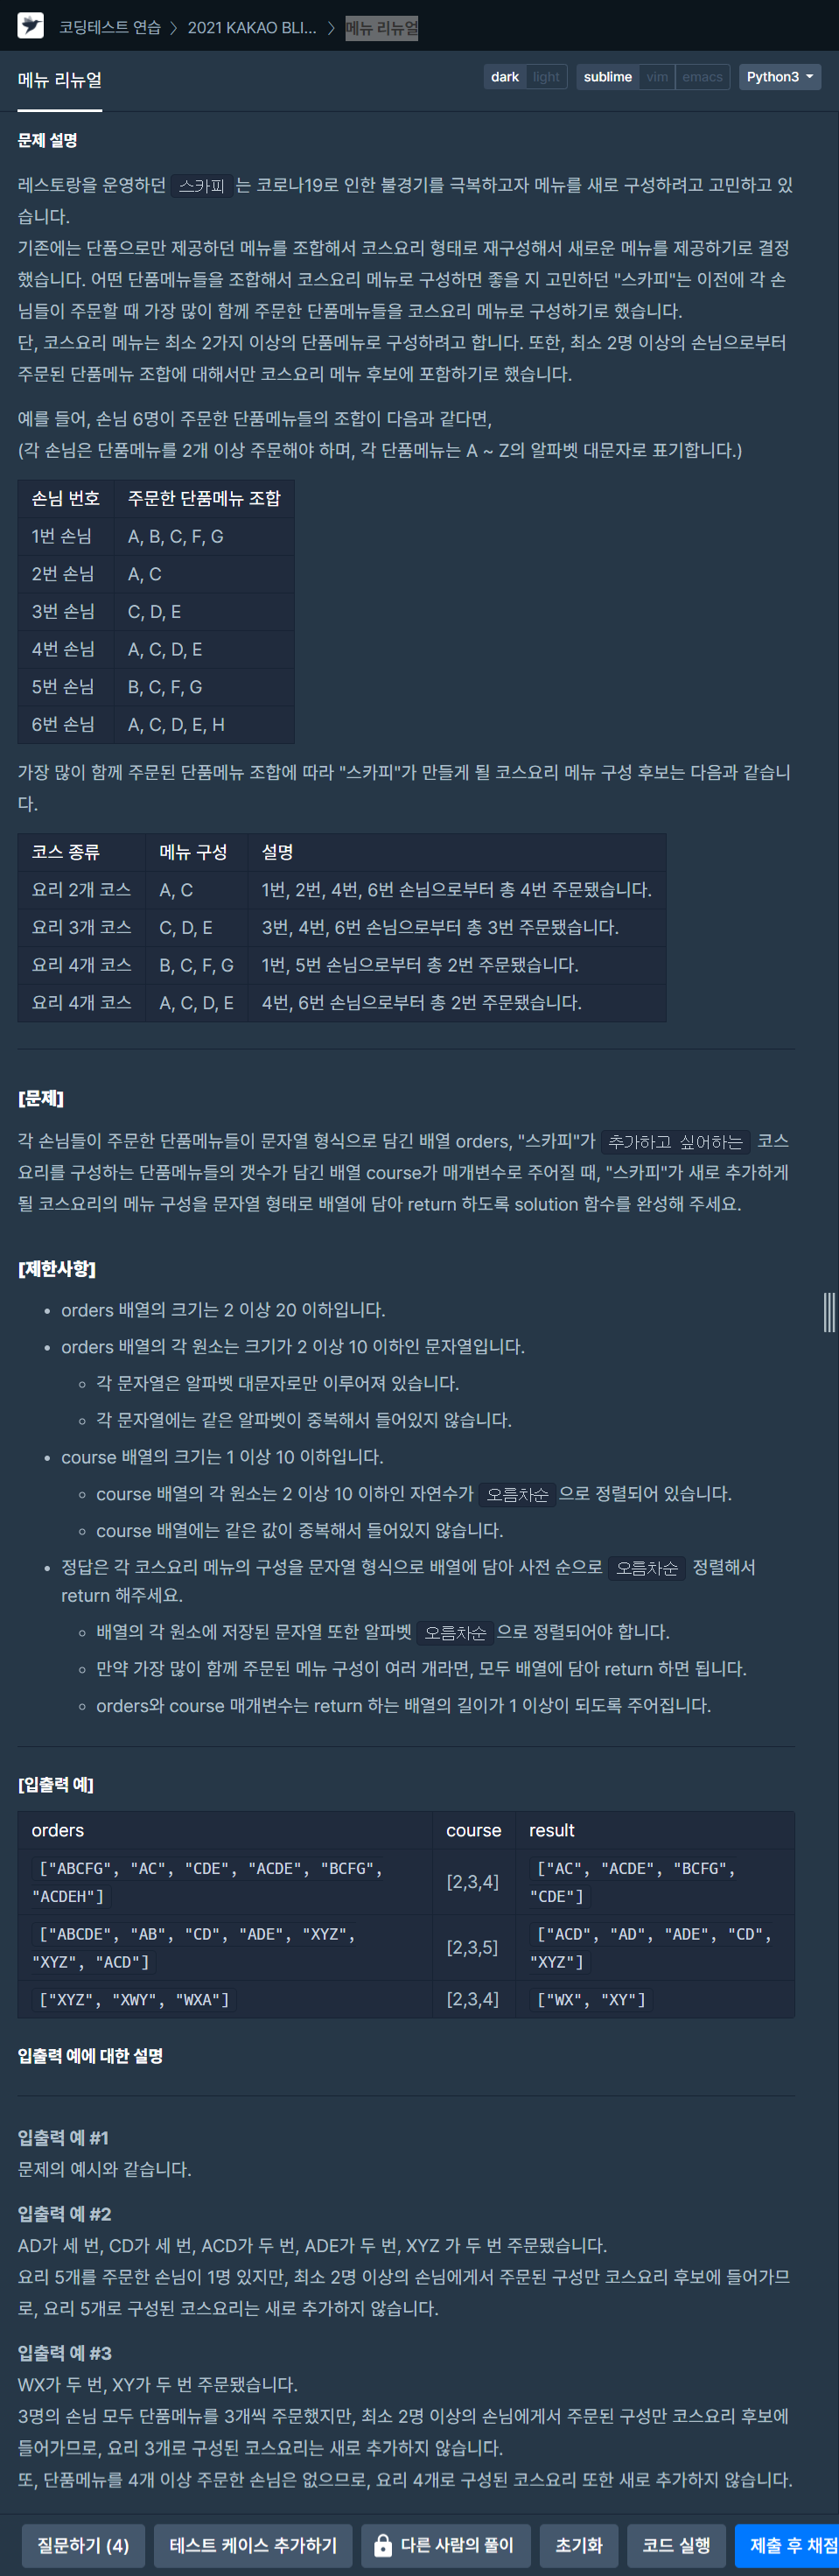

__시간초과 뜬 첫번째 풀이__
- course의 수를 첫번째 loop로 순회
- 1. orders에서 나온 모든 문자에 대한 set을 통해 조합을 통해 나올 수 있는 모든 경우의수로 dictionary를 생성
- 2. 모든 dictionary key를 통해서, 해당 dictionary의 값이 존재하는지를 확인하여 +=1
- 너무 쓸데없는 곳을 탐색하는 경향이 있어, 시간적으로 상당히 비효율적

In [58]:
# 17:15 start

def solution(orders, course):
    
    from itertools import combinations
    
    answer = []
    
    set_char_list = list(set(list(''.join(orders))))
    
    
    
    for course_num in course:

        comb_list = [''.join(sorted(i)) for i in list(combinations(set_char_list, course_num))]
        
        
        comb_dict = dict.fromkeys(comb_list, 0)
        
        for comb_ord in comb_dict.keys():
            for order in orders:
                if set(comb_ord).issubset(set(list(order))) == True:
                    comb_dict[comb_ord] += 1
        
        
        max_val = max(comb_dict.values())
        max_keys = [k for k, v in comb_dict.items() if (v == max_val) & (max_val >= 2)]
        
        answer.extend(max_keys)
        
        print('max_keys : ', max_keys)
    
    answer = sorted(answer)
        
        
    return answer

solution(["ABCDE", "AB", "CD", "ADE", "XYZ", "XYZ", "ACD"], [2,3,5])

max_keys :  ['AD', 'CD']
max_keys :  ['ADE', 'ACD', 'XYZ']
max_keys :  []


['ACD', 'AD', 'ADE', 'CD', 'XYZ']

__시간초과는 안뜨고 성공했지만, 시간이 그래도 어느정도 소요된 코드__
- 위와 비슷하지만, 주문한 곳에서 combination을 통해 진행

In [69]:
def solution(orders, course):
    
    from itertools import combinations
    
    answer = []
    
    set_char_list = list(set(list(''.join(orders))))
    
    
    
    for course_num in course:

        comb_list = [''.join(sorted(i)) for i in list(combinations(set_char_list, course_num))]
        
        
        comb_dict = dict.fromkeys(comb_list, 0)
        
        
        for order in orders:
            for i in [''.join(sorted(j)) for j in combinations(list(order), course_num)]:
                comb_dict[i] += 1
        
        
        max_val = max(comb_dict.values())
        max_keys = [k for k, v in comb_dict.items() if (v == max_val) & (max_val >= 2)]
        
        answer.extend(max_keys)
        
        
    answer = sorted(answer)
        
        
    return answer

solution(["ABCFG", "AC", "CDE", "ACDE", "BCFG", "ACDEH"], [2,3,4])

['AC', 'ACDE', 'BCFG', 'CDE']

__참고한 다른 사람의 풀이 - 1__ 

In [70]:
from itertools import combinations
from collections import Counter

def solution(orders, course):
    answer = []
    
    for c in course:
        temp = []
        for order in orders:
            combi = combinations(sorted(order), c)
            temp += combi
        counter = Counter(temp)
        if len(counter) != 0 and max(counter.values()) != 1:
            answer += [''.join(f) for f in counter if counter[f] == max(counter.values())]
            
    return sorted(answer)